
<div dir=ltr align=center>

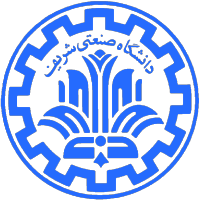

<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2025 <br>
<font color=3C99D size=5>
    Dimensionality Reduction: Principal Component Analysis<br>
<font color=696880 size=4>
    Prepared by Fatemeh Khojasteh <br>

<font color=696880 size=2>
    Curated by Alireza Mirshafieian

____

# Student Information

In [1]:
student_number = '402171075'
full_name = 'Parsa Malekian'

# Image Compression with PCA (From Scratch)

## Objective
 The goal of this assignment is to gain a deep understanding of **Principal Component Analysis (PCA)** by implementing it from scratch and applying it to image compression.

## Problem Statement
 Consider a grayscale image. We want to reduce its dimensionality by dividing the image into small "patches" and treating each patch as a data vector.

**Workflow:**
 1.  **Image Preparation:** Load the local image and convert it to grayscale.
 2.  **Patch Extraction:** Divide the image into small squares (e.g., $12 \times 12$). Each patch, when flattened, becomes a vector of dimension $144$.
 3.  **PCA Implementation:** Complete the `PCAFromScratch` class. You must calculate the covariance matrix, find eigenvalues/eigenvectors, and project data into a lower-dimensional space.
 4.  **Compression & Reconstruction:** Project the patches into a lower-dimensional space (e.g., 16 dimensions) and then reconstruct them back to 144 dimensions.
 5.  **Stitching:** Reassemble the reconstructed patches to form the final image.
 6.  **Visualization:** Visualize the top 16 Principal Components (Eigenfaces/Eigenpatches).


## Rules & Constraints
 1.  **No `sklearn`:** You are **NOT** allowed to use `sklearn.decomposition.PCA`. You must implement the logic using `numpy` (functions like `np.cov`, `np.linalg.eig`, `np.linalg.svd` are allowed).
 2.  **Allowed Libraries:** `numpy`, `matplotlib`, `cv2` (or `PIL`).
 3.  **Flexibility:** Your code should handle images that may not be perfectly divisible by the patch size (you should implement cropping logic).


In [2]:
# Import needed libraries

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

## Part 1: PCA Class Implementation

 In this section, you must implement the PCA algorithm from scratch.

 **Implementation Steps for `fit`:**
 1. Calculate the mean of the columns.
 2. Center the data ($X - \text{mean}$).
 3. Compute the Covariance Matrix.
 4. Compute Eigenvalues and Eigenvectors.
 5. Sort Eigenvectors by Eigenvalues in descending order.
 6. Store the top `n_components` eigenvectors.

In [3]:
class PCAFromScratch:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.eigenvalues = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        self.eigenvalues = eigenvalues[:self.n_components]
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def inverse_transform(self, X_transformed):
        return np.dot(X_transformed, self.components.T) + self.mean

## Part 2: Patch Extraction Logic

 Implement functions to convert an image into a matrix of patches and vice versa.

 *Hint: It is easier to crop the image first so that its dimensions are divisible by the patch size.*


In [4]:
def get_valid_image_dims(image, patch_size):
    h, w = image.shape
    ph, pw = patch_size
    new_h = (h // ph) * ph
    new_w = (w // pw) * pw
    return image[:new_h, :new_w]


def image_to_patches(image, patch_size=(12, 12)):
    cropped = get_valid_image_dims(image, patch_size)
    h, w = cropped.shape
    ph, pw = patch_size
    n_h = h // ph
    n_w = w // pw
    patches = cropped.reshape(n_h, ph, n_w, pw)
    patches = patches.transpose(0, 2, 1, 3)
    patches = patches.reshape(n_h * n_w, ph * pw)
    return patches, (h, w)


def patches_to_image(patches, original_shape, patch_size=(12, 12)):
    h, w = original_shape
    ph, pw = patch_size
    n_h = h // ph
    n_w = w // pw
    patches = patches.reshape(n_h, n_w, ph, pw)
    patches = patches.transpose(0, 2, 1, 3)
    image = patches.reshape(h, w)
    return image



## Part 3: Execution Pipeline

 Write the code to execute the PCA pipeline.

 1. Load the image.
 2. Convert image to patches.
 3. Run PCA.
 4. Reconstruct image.
 5. Calculate error.

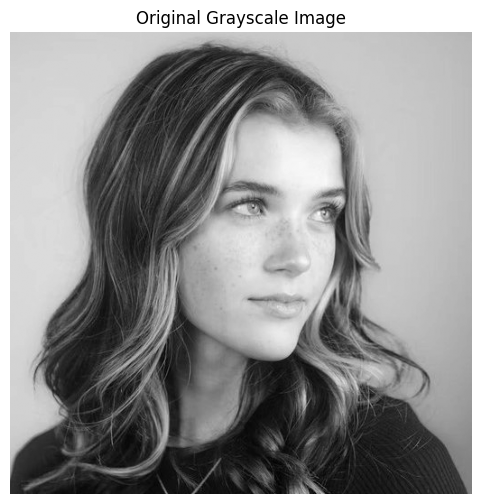

In [5]:
# --- 1. Load Image ---
# Ensure 'image.jpg' is in the same directory
IMAGE_PATH = 'image.jpg'

if not os.path.exists(IMAGE_PATH):
    print(f"Warning: {IMAGE_PATH} not found. Generating random noise for testing.")
    original_image = np.random.rand(512, 512) * 255
else:
    img = Image.open(IMAGE_PATH).convert('L') # Convert to Grayscale
    original_image = np.array(img)

plt.figure(figsize=(6, 6))
plt.title("Original Grayscale Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
PATCH_SIZE = (12, 12)

patches, valid_shape = image_to_patches(original_image, PATCH_SIZE)

print(f'Original Image Shape: {original_image.shape}')
print(f'Valid Image Shape (Cropped): {valid_shape}')
print(f'Patches Matrix Shape: {patches.shape}')

Original Image Shape: (512, 512)
Valid Image Shape (Cropped): (504, 504)
Patches Matrix Shape: (1764, 144)


In [7]:
N_COMPONENTS = 16

pca = PCAFromScratch(N_COMPONENTS)
pca.fit(patches)

total_variance = np.sum(np.linalg.eigvalsh(np.cov(patches - np.mean(patches, axis=0), rowvar=False)))
explained_variance = np.sum(pca.eigenvalues)
explained_ratio = explained_variance / total_variance * 100
print(f'Explained Variance Ratio (Top {N_COMPONENTS}): {explained_ratio:.2f}%')

Explained Variance Ratio (Top 16): 99.09%


In [8]:
compressed = pca.transform(patches)
reconstructed_patches = pca.inverse_transform(compressed)

print(f'Compressed Shape: {compressed.shape}')
print(f'Reconstructed Patches Shape: {reconstructed_patches.shape}')

Compressed Shape: (1764, 16)
Reconstructed Patches Shape: (1764, 144)


In [9]:
reconstructed_image = patches_to_image(reconstructed_patches, valid_shape, PATCH_SIZE)

cropped_original = get_valid_image_dims(original_image, PATCH_SIZE)
mse = np.mean((cropped_original - reconstructed_image) ** 2)
print(f'Reconstruction MSE: {mse:.2f}')

Reconstruction MSE: 25.36


## Part 4: Visualization

 Visualize the results and the learned features.


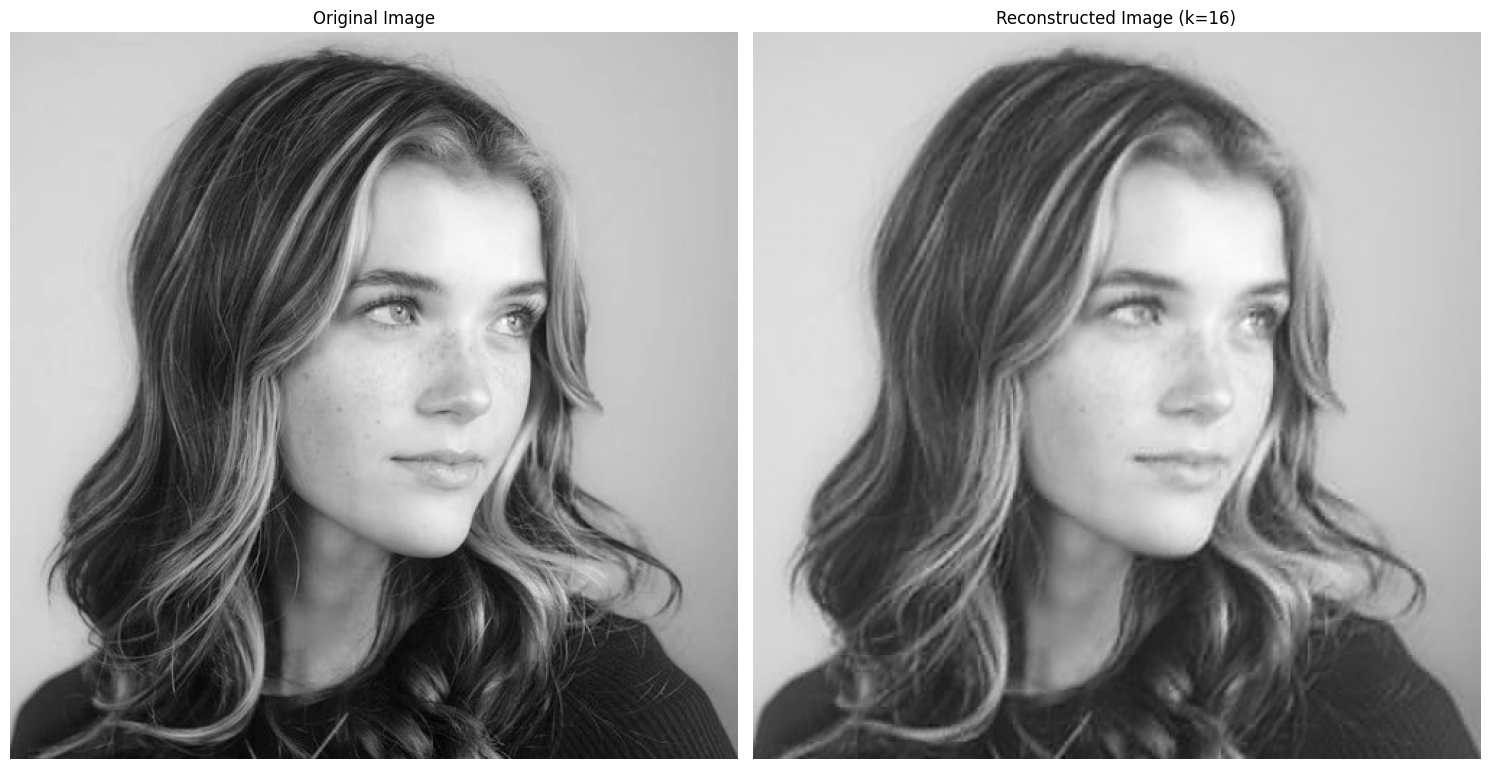

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].imshow(cropped_original, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title(f'Reconstructed Image (k={N_COMPONENTS})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 1. Quality Comparison (Reconstruction Quality)

In the image above, you can see the original image next to the reconstructed one.

* **Interpretation:** The image on the right has been reconstructed using only **16 components**. Even though the data dimensions have been reduced by 9 times (from 144 features per patch to 16 features), the image is still easily recognizable.
* **Quality Loss:** If you look closely, the reconstructed image appears slightly "blurry," and high-frequency details (such as very fine textures on the hat or hair) have been removed. This is the price we pay for compression.
* **MSE:** The MSE (Mean Squared Error) value indicates the average squared error between the original and reconstructed pixels.


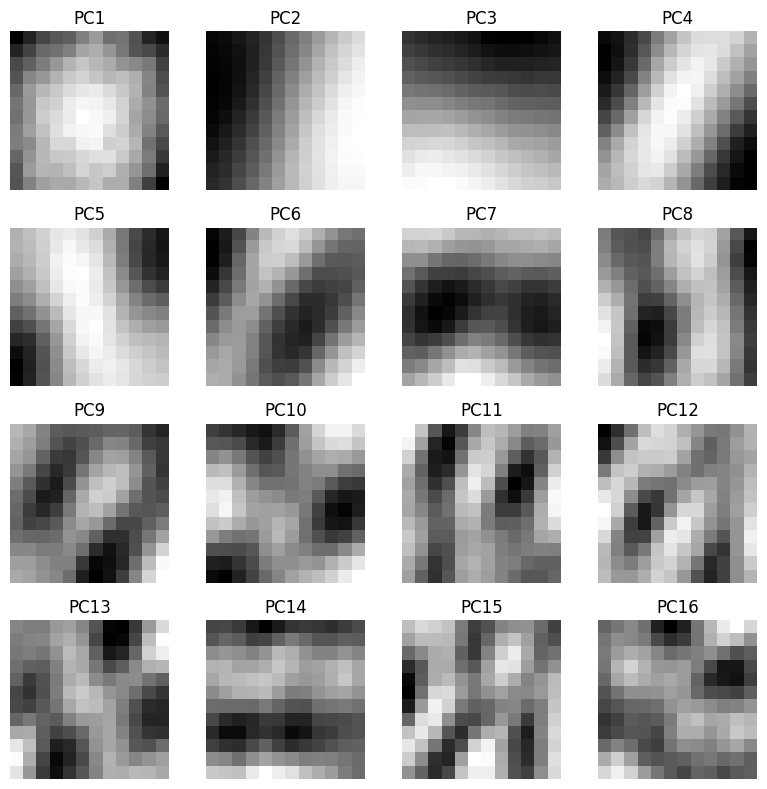

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i in range(N_COMPONENTS):
    ax = axes[i // 4, i % 4]
    eigenpatch = pca.components[:, i].reshape(PATCH_SIZE)
    ax.imshow(eigenpatch, cmap='gray')
    ax.set_title(f'PC{i + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In the image above, you can see the top 16 eigenvectors, which have been reshaped to dimensions of $12 \times 12$.

* **What are these?** These small squares are actually the "building blocks" of the image. The PCA algorithm has extracted these patterns from the Lenna image. Each patch in the final image is a linear combination of these 16 shapes.
* **Pattern Analysis:**
    * **Initial components (like PC1 and PC2):** Typically represent overall lighting changes and simple gradients (low frequency).
    * **Middle components:** Start to display directions (horizontal, vertical, or diagonal edges).
    * **Final components:** Model more complex details and fine textures (high frequency).
* **Why are they checkerboard-like?** These patterns are orthogonal and aim to cover the maximum variance present in the data.
